# 🔄 Conversión de Formatos 3D

- **Directorio de datos:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\data`

- **Directorio de resultados:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados`

## 📂 Cargando modelos desde `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\data`

📥 Modelo cargado: `base.glb`

📥 Modelo cargado: `base.obj`

📥 Modelo cargado: `base.stl`

🔍 Análisis del modelo base.glb:
- Vértices: 64275
- Caras: 59999
- Normales: No (No module named 'scipy')
- Duplicados: 34270

🔍 Análisis del modelo base.obj:
- Vértices: 63960
- Caras: 59999
- Normales: Sí
- Duplicados: 33955

🔍 Análisis del modelo base.stl:
- Vértices: 30005
- Caras: 59999
- Normales: No (No module named 'scipy')
- Duplicados: 0



## 📊 Comparación de modelos

,Modelo,Vértices,Caras,Duplicados
0,base.glb,64275,59999,34270
1,base.obj,63960,59999,33955
2,base.stl,30005,59999,0


📝 Resultados guardados en: `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\comparacion_modelos.csv`

## 🔄 Conversión de formatos

**✅ Modelo exportado como OBJ:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.obj`

**✅ Modelo exportado como STL:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.stl`

**✅ Modelo exportado como GLB:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.glb`

**✅ Modelo exportado como OBJ:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.obj`

**✅ Modelo exportado como STL:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.stl`

**✅ Modelo exportado como GLB:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.glb`

**✅ Modelo exportado como OBJ:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.obj`

**✅ Modelo exportado como STL:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.stl`

**✅ Modelo exportado como GLB:** `c:\Users\juanj\Documents\github\ComputacionVisual\2025-05-04_taller_conversion_formatos_3d\resultados\converted_base.glb`

## 👁️ Visualización de modelos

### Visualizando: base.glb

#### Visualización con Trimesh:

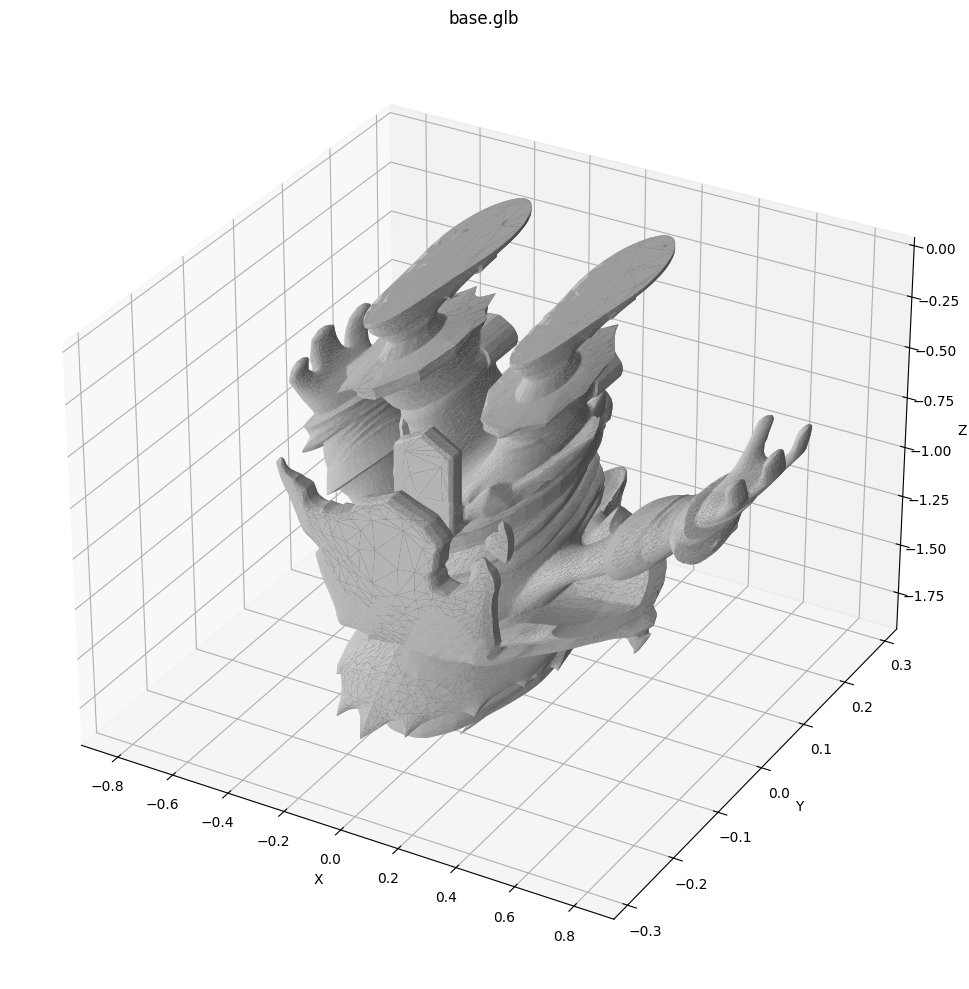

#### Visualización con Open3D (ventana interactiva):

Visualizando: base.glb


### Visualizando: base.obj

#### Visualización con Trimesh:

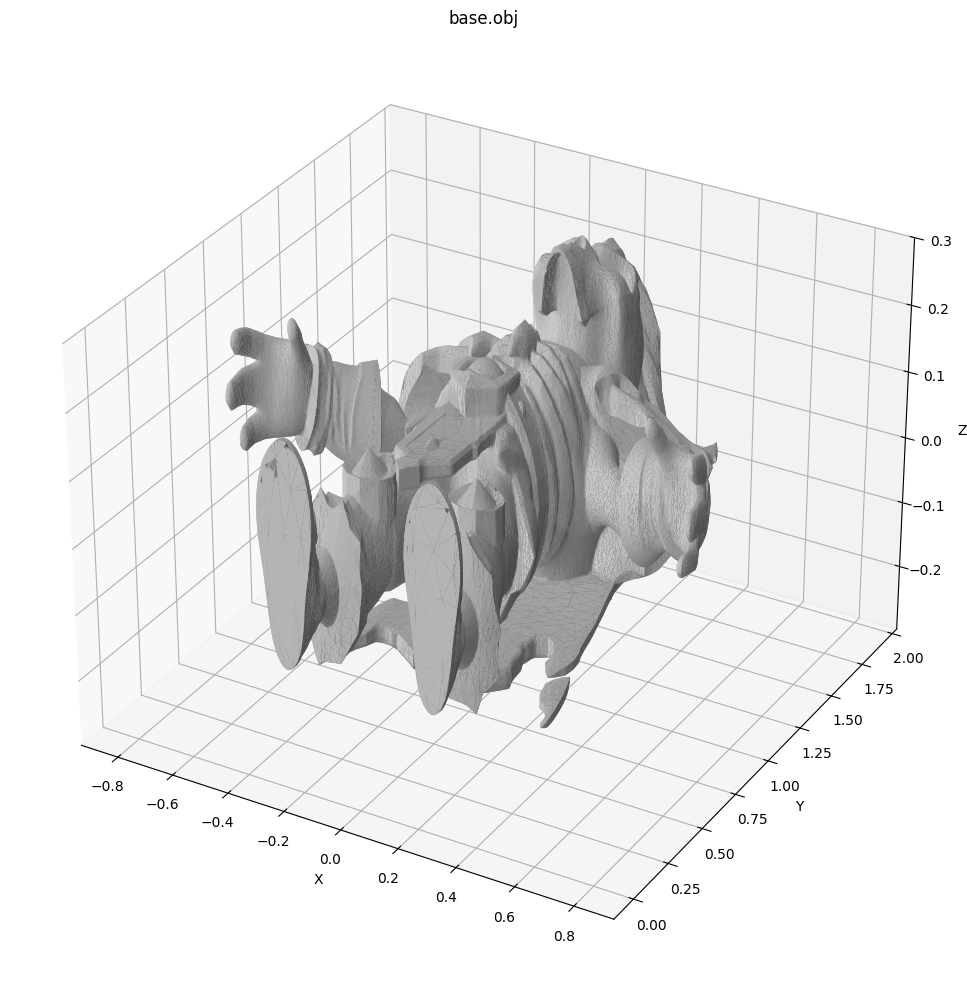

#### Visualización con Open3D (ventana interactiva):

Visualizando: base.obj


### Visualizando: base.stl

#### Visualización con Trimesh:

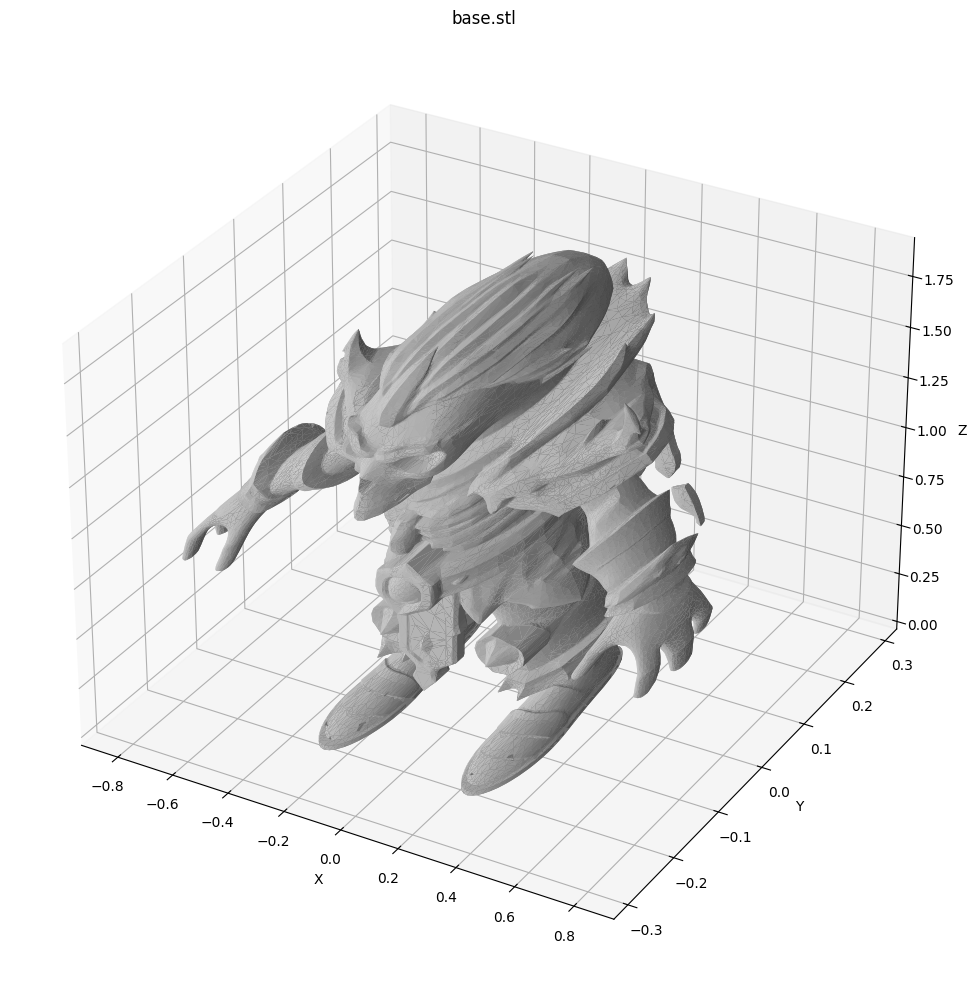

#### Visualización con Open3D (ventana interactiva):

Visualizando: base.stl


In [8]:
import trimesh
import numpy as np
import os
from pathlib import Path
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import open3d as o3d

def analizar_modelo(modelo, nombre):
    """Realiza un análisis básico de un modelo 3D y devuelve sus características principales"""
    resultados = {"Nombre": nombre}
    
    # Convertir escena a malla si es necesario
    if isinstance(modelo, trimesh.Scene):
        if not modelo.geometry:
            print(f"⚠️ La escena {nombre} está vacía")
            return None
        modelo = trimesh.util.concatenate([mesh for mesh in modelo.geometry.values()])
    
    # Extraer propiedades básicas
    resultados["Vértices"] = len(modelo.vertices)
    resultados["Caras"] = len(modelo.faces)
    
    # Verificar normales
    try:
        _ = modelo.vertex_normals
        resultados["Normales"] = "Sí"
    except Exception as e:
        resultados["Normales"] = f"No ({str(e)})"
    
    # Calcular vértices duplicados
    vertices_unicos = np.unique(modelo.vertices, axis=0)
    duplicados = len(modelo.vertices) - len(vertices_unicos)
    resultados["Duplicados"] = duplicados
    
    # Mostrar resultados
    print(f"🔍 Análisis del modelo {nombre}:")
    print(f"- Vértices: {resultados['Vértices']}")
    print(f"- Caras: {resultados['Caras']}")
    print(f"- Normales: {resultados['Normales']}")
    print(f"- Duplicados: {resultados['Duplicados']}")
    print()
    
    return modelo, resultados


def exportar_modelo(modelo, ruta_salida):
    """Exporta un modelo 3D al formato especificado por la extensión de la ruta"""
    try:
        # Obtener formato de la extensión
        formato = Path(ruta_salida).suffix[1:].upper()
        
        # Crear directorio si no existe
        Path(ruta_salida).parent.mkdir(parents=True, exist_ok=True)
        
        # Exportar modelo
        modelo.export(ruta_salida)
        
        # Mostrar mensaje de éxito con emoji
        display(Markdown(f"**✅ Modelo exportado como {formato}:** `{ruta_salida}`"))
        
    except Exception as e:
        display(Markdown(f"**❌ Error al exportar:** {str(e)}"))


def comparar_modelos(modelos_info):
    """Compara modelos 3D y muestra los resultados en una tabla interactiva"""
    if not modelos_info:
        print("❌ No hay modelos para comparar")
        return
    
    # Crear DataFrame para la comparación
    datos = []
    for modelo, info in modelos_info:
        if isinstance(modelo, trimesh.Scene):
            modelo = trimesh.util.concatenate([g for g in modelo.geometry.values()])
        
        datos.append({
            "Modelo": info["Nombre"],
            "Vértices": len(modelo.vertices),
            "Caras": len(modelo.faces),
            "Duplicados": len(modelo.vertices) - len(np.unique(modelo.vertices, axis=0))
        })
    
    # Crear DataFrame y mostrar
    df = pd.DataFrame(datos)
    display(Markdown("## 📊 Comparación de modelos"))
    display(df)
    
    # Guardar resultados en archivo
    notebook_dir = Path().absolute()
    resultados_dir = notebook_dir.parent / "resultados"
    resultados_dir.mkdir(exist_ok=True)
    
    # Guardar como CSV
    csv_path = resultados_dir / "comparacion_modelos.csv"
    df.to_csv(csv_path, index=False)
    
    display(Markdown(f"📝 Resultados guardados en: `{csv_path}`"))
    
    return df


def cargar_modelos(directorio):
    """Carga modelos 3D desde un directorio y devuelve una lista de modelos y sus nombres"""
    directorio = Path(directorio)
    modelos = []
    nombres = []
    
    # Buscar archivos con extensiones de modelos 3D
    formatos_soportados = ['.obj', '.stl', '.glb', '.gltf', '.ply', '.3ds']
    archivos_modelo = [f for f in directorio.iterdir() if f.suffix.lower() in formatos_soportados]
    
    if not archivos_modelo:
        display(Markdown(f"⚠️ No se encontraron modelos 3D en `{directorio}`"))
        return [], []
    
    # Cargar cada modelo
    display(Markdown(f"## 📂 Cargando modelos desde `{directorio}`"))
    
    for archivo in archivos_modelo:
        try:
            modelo = trimesh.load(archivo)
            modelos.append(modelo)
            nombres.append(archivo.name)
            display(Markdown(f"📥 Modelo cargado: `{archivo.name}`"))
        except Exception as e:
            display(Markdown(f"❌ Error al cargar `{archivo.name}`: {str(e)}"))
    
    return modelos, nombres


def visualizar_modelo_trimesh(modelo, titulo=None):
    """Visualiza un modelo 3D de forma estática usando matplotlib"""
    # Unificar escena a una única malla si es necesario
    if isinstance(modelo, trimesh.Scene):
        if not modelo.geometry:
            print("⚠️ La escena está vacía")
            return
        mesh = trimesh.util.concatenate([m for m in modelo.geometry.values()])
    else:
        mesh = modelo
    
    # Crear figura 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    if titulo:
        ax.set_title(titulo)
    
    # Dibujar superficie triangulada
    ax.plot_trisurf(
        mesh.vertices[:, 0],
        mesh.vertices[:, 1],
        triangles=mesh.faces,
        Z=mesh.vertices[:, 2],
        color=(0.8, 0.8, 0.8, 1.0),
        linewidth=0.2,
        antialiased=True
    )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()


def visualizar_modelo_open3d(modelo, titulo=None):
    """Visualiza un modelo 3D usando Open3D"""
    # Convertir trimesh a Open3D
    if isinstance(modelo, trimesh.Scene):
        if not modelo.geometry:
            print("⚠️ La escena está vacía")
            return
        modelo = trimesh.util.concatenate([mesh for mesh in modelo.geometry.values()])
    
    # Crear malla Open3D
    mesh_o3d = o3d.geometry.TriangleMesh()
    mesh_o3d.vertices = o3d.utility.Vector3dVector(modelo.vertices)
    mesh_o3d.triangles = o3d.utility.Vector3iVector(modelo.faces)
    mesh_o3d.compute_vertex_normals()
    
    # Asignar colores si están disponibles
    if hasattr(modelo, 'visual') and hasattr(modelo.visual, 'vertex_colors'):
        colors = modelo.visual.vertex_colors[:, :3] / 255.0
        mesh_o3d.vertex_colors = o3d.utility.Vector3dVector(colors)
    else:
        mesh_o3d.paint_uniform_color([0.7, 0.7, 0.7])
    
    if titulo:
        print(f"Visualizando: {titulo}")
    o3d.visualization.draw_geometries([mesh_o3d], window_name=titulo or "Modelo 3D")


# ---------- EJECUCIÓN PRINCIPAL ----------

# Configurar rutas
notebook_dir = Path().absolute()
data_dir = notebook_dir.parent / 'data'
output_dir = notebook_dir.parent / 'resultados'

# Crear directorio de salida
output_dir.mkdir(exist_ok=True)

display(Markdown(f"# 🔄 Conversión de Formatos 3D"))
display(Markdown(f"- **Directorio de datos:** `{data_dir}`"))
display(Markdown(f"- **Directorio de resultados:** `{output_dir}`"))

# Cargar modelos
modelos, nombres = cargar_modelos(data_dir)

# Analizar modelos
resultados = []
modelos_analizados = []

for modelo, nombre in zip(modelos, nombres):
    resultado = analizar_modelo(modelo, nombre)
    if resultado:
        modelos_analizados.append(resultado[0])
        resultados.append(resultado)

# Comparar modelos
if resultados:
    comparacion_df = comparar_modelos(resultados)

    # Exportar modelos a diferentes formatos
    display(Markdown("## 🔄 Conversión de formatos"))
    
    for modelo, info in resultados:
        base_nombre = Path(info["Nombre"]).stem
        
        for formato in ['.obj', '.stl', '.glb']:
            ruta_salida = output_dir / f"converted_{base_nombre}{formato}"
            exportar_modelo(modelo, ruta_salida)
    
    # Visualizar modelos
    display(Markdown("## 👁️ Visualización de modelos"))
    
    for modelo, info in resultados:
        nombre = info["Nombre"]
        display(Markdown(f"### Visualizando: {nombre}"))
        
        display(Markdown("#### Visualización con Trimesh:"))
        visualizar_modelo_trimesh(modelo, titulo=nombre)
        
        display(Markdown("#### Visualización con Open3D (ventana interactiva):"))
        visualizar_modelo_open3d(modelo, titulo=nombre)
else:
    display(Markdown("❌ No se pudieron analizar los modelos"))
